# Gradient Descent in pratice

<img src="resources/gradient_descent.gif"  />

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Given data
X = 2.5 * np.random.rand(100) + 1.5   
res = 0.2 * np.random.randn(100)
Y = 0.3 * X + res

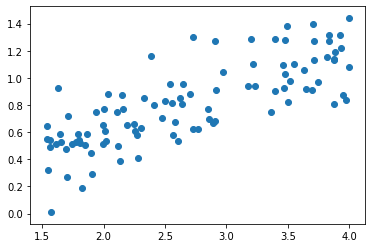

In [43]:
plt.scatter(X,Y)

# Q1: Implement Gradient descent and plot resulting regression line and data points

#### 1. implement mse loss function, compare your results with sklearns mse function
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$MSE_{matrix} = \frac{1}{2N} \lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} $


#### HINT: 
---
$\lvert \lvert \mathbf{X}w_{1} - \mathbf{y} \lvert \lvert^{2} = (\mathbf{X}w - \mathbf{y})^{T}(\mathbf{X}w - \mathbf{y})$ 

In [44]:
def mse_mine(X, w1, Y_true):
    mse = np.dot((w1*X-Y_true).T,w1*X-Y_true) / (len(X))
    return mse
mse_mine(X,2,Y)

22.7839665682932

In [45]:
import sklearn.metrics as sklme
def mse_function(X,w,Y):
    return sklme.mean_squared_error(2*X,Y)
mse_function(X,2,Y)

22.783966568293202

#### 2. implement gradient descent algorithm
#### Algorithm pseudo-code
---
```python
Randomly initialize w(0)
for step in range(training steps):
    w(t+1) = w(t) - alpha * grad( J( w(t) ) ) 
    mse = mse(w(t+1))
    print(mse)
```
#### Hints: 
---
- Start with a w value of 100
- grad( J( w(t) ) ) = ($\nabla_{w_{1}} MSE$)
- $\nabla_{w_{1}} MSE = w_{1}\mathbf{X^{T}X} - \mathbf{X^{T}y}$

##### 3. run gradient descent for 100 training iterations with a learning rate alpha = [0.05, 0.01, 0.005] and plot the mse-error(y-axis) over the number of training iterations(x-axis) for each alpha

0.30065516598136083

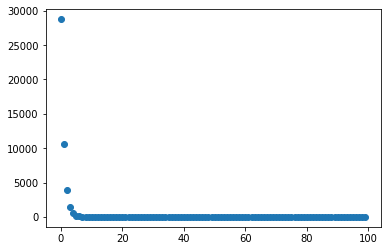

In [46]:
def gradient_descent(X, Y, training_itrs, alpha):
    
    w = 100
    mse_error = []
    
    for step in range(training_itrs):
        w = w - alpha * (w * np.dot(X.T,X) - np.dot(X.T,Y)) / len(X)
        mse_error.append(mse_mine(X,w,Y))
    plt.scatter(list(range(training_itrs)), mse_error)
    return w

gradient_descent(X,Y,100,0.05)

# Q2. Use sklearn to compare multiple different linear regression algorithms
## Data Science use case : Real estate analysis

## TODO:
---
##### 1. Split data into training and test set
- shuffle the data
- 80 % training set, 20 % test set
- use numpy
- at the end you should have: x_train, y_train, x_test, y_test

##### 2. Separate labels(house price) from rest of the data
##### 3. Fill in missing values and drop categorical ones
##### 4. Train model using the following regression methods from sklearn:
- Linear Regression
- Ridge Regression
- ElasticNet
Documentation: https://scikit-learn.org/stable/modules/linear_model.html

##### 5. Compute MSE and residual error on test set for each method
##### 6. Compute the average house price
##### 7. Compute the max. house prize
##### 8. Compute the min. house prize
##### 9. Compute histogram of house prices
##### 10. Compute percentage of house prices higher than 1 mio. and plot histogram of those above 1 mio.
##### 11. Which object offers the most rooms ? Whats the prize ?
##### 12. How much do you, on average, pay for a room ? 

### Just FYI:
---
Formula for multidimensional linear regression:


Loss = $\frac{1}{N} \lvert\lvert \mathbf{X}\mathbf{w}-\mathbf{y} \lvert\lvert^{2}$

$\mathbf{X}\epsilon\mathbb{R^{Nxd}}$,
$\mathbf{w}\epsilon\mathbb{R^{dx1}}$,
$\mathbf{y}\epsilon\mathbb{R^{Nx1}}$

In [47]:
data = pd.read_csv('data/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [48]:
data.iloc[:,0:-1]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
# split data
data_array = np.asarray(data.iloc[:,:-1])
np.random.shuffle(data_array)
train = data_array[:int(0.8*len(data_array)),:]
test = data_array[int(0.8*len(data_array)):,:]
x_train = train[:,:-1]
y_train = train[:,-1]
x_test = test[:,:-1]
y_test = test[:,-1]

##### 4. Train model using the following regression methods from sklearn:
- Linear Regression
- Ridge Regression
- ElasticNet
Documentation: https://scikit-learn.org/stable/modules/linear_model.html

##### 5. Compute MSE and residual error on test set for each method


In [51]:
# linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

mse = sklme.mean_squared_error(reg.predict(x_test),y_test)
res_error = sum(reg.predict(x_test)-y_test)
print("mse = ",mse)
print("residue error = ",res_error)


mse =  10344789850.658844
residue error =  -1102866.4036656169


In [52]:
# Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=10)
clf.fit(x_train, y_train)

sklme.mean_squared_error(clf.predict(x_test),y_test)
res_error = sum(clf.predict(x_test)-y_test)
print("mse = ",mse)
print("residue error = ",res_error)

mse =  10344789850.658844
residue error =  -1076478.4476011738


##### 6. Compute the average house price
##### 7. Compute the max. house prize
##### 8. Compute the min. house prize
##### 9. Compute histogram of house prices
##### 10. Compute percentage of house prices higher than 1 mio. and plot histogram of those above 1 mio.
##### 11. Which object offers the most rooms ? Whats the prize ?
##### 12. How much do you, on average, pay for a room ? 

### Just FYI:
---
Formula for multidimensional linear regression:


Loss = $\frac{1}{N} \lvert\lvert \mathbf{X}\mathbf{w}-\mathbf{y} \lvert\lvert^{2}$

$\mathbf{X}\epsilon\mathbb{R^{Nxd}}$,
$\mathbf{w}\epsilon\mathbb{R^{dx1}}$,
$\mathbf{y}\epsilon\mathbb{R^{Nx1}}$

In [53]:
#avg, max, min
data["Price"].mean(), data["Price"].max(), data["Price"].min()

(1232072.65414236, 2469065.5941747027, 15938.657923287848)

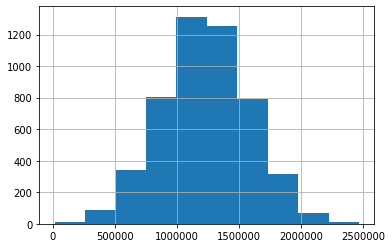

In [54]:
data["Price"].hist()

0.9994


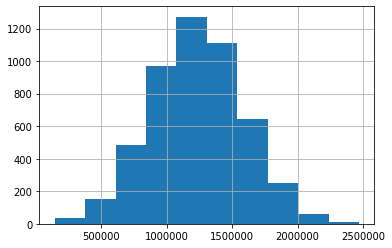

In [55]:
# Compute percentage of house prices higher than 1 mio. 
# and plot histogram of those above 1 mio.

print(data[data["Price"]>100000].shape[0] /data.shape[0])
data[data["Price"]>100000]["Price"].hist()

# Q4: Non-linear regression

### Apply linear regression methods on provided dataset

In [56]:
X = 2.5 * np.random.rand(100) + 1.5   
res = 0.2 * np.random.randn(100)
Y = 0.3 * X**10 + res

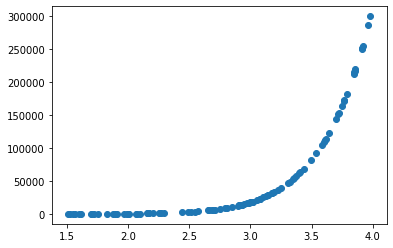

In [57]:
plt.scatter(X,Y)

### Non-linear regression algorithms

Luckily there exist some non-linear regression algorithms that we can use instead:

#### Support Vector Regression:: 
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

#### TODO:
----

1. Use noted algorithm to fit the data, play arround with different kernels and other hyperparameters(like shown in the link above)

2. Plot the regression line together with the data

D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


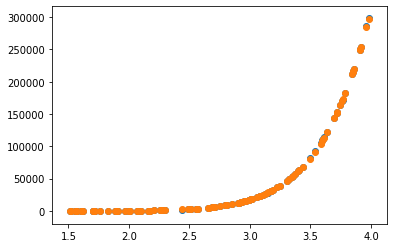

In [61]:
from sklearn.svm import SVR

clf = SVR(C=10000000, epsilon=0.2)
clf.fit(X.reshape(-1,1), Y)
y_predict = clf.predict(X.reshape(-1,1))
plt.scatter(X,Y)
plt.scatter(X.reshape(-1,1),y_predict)

# Q5: Apply learned methods on 1 dataset of your choice(optional)
Datasets and kernels can be found here: https://www.kaggle.com/